In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('web-page-phishing.csv')
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
df.shape

(100077, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [13]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

In [5]:
df.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


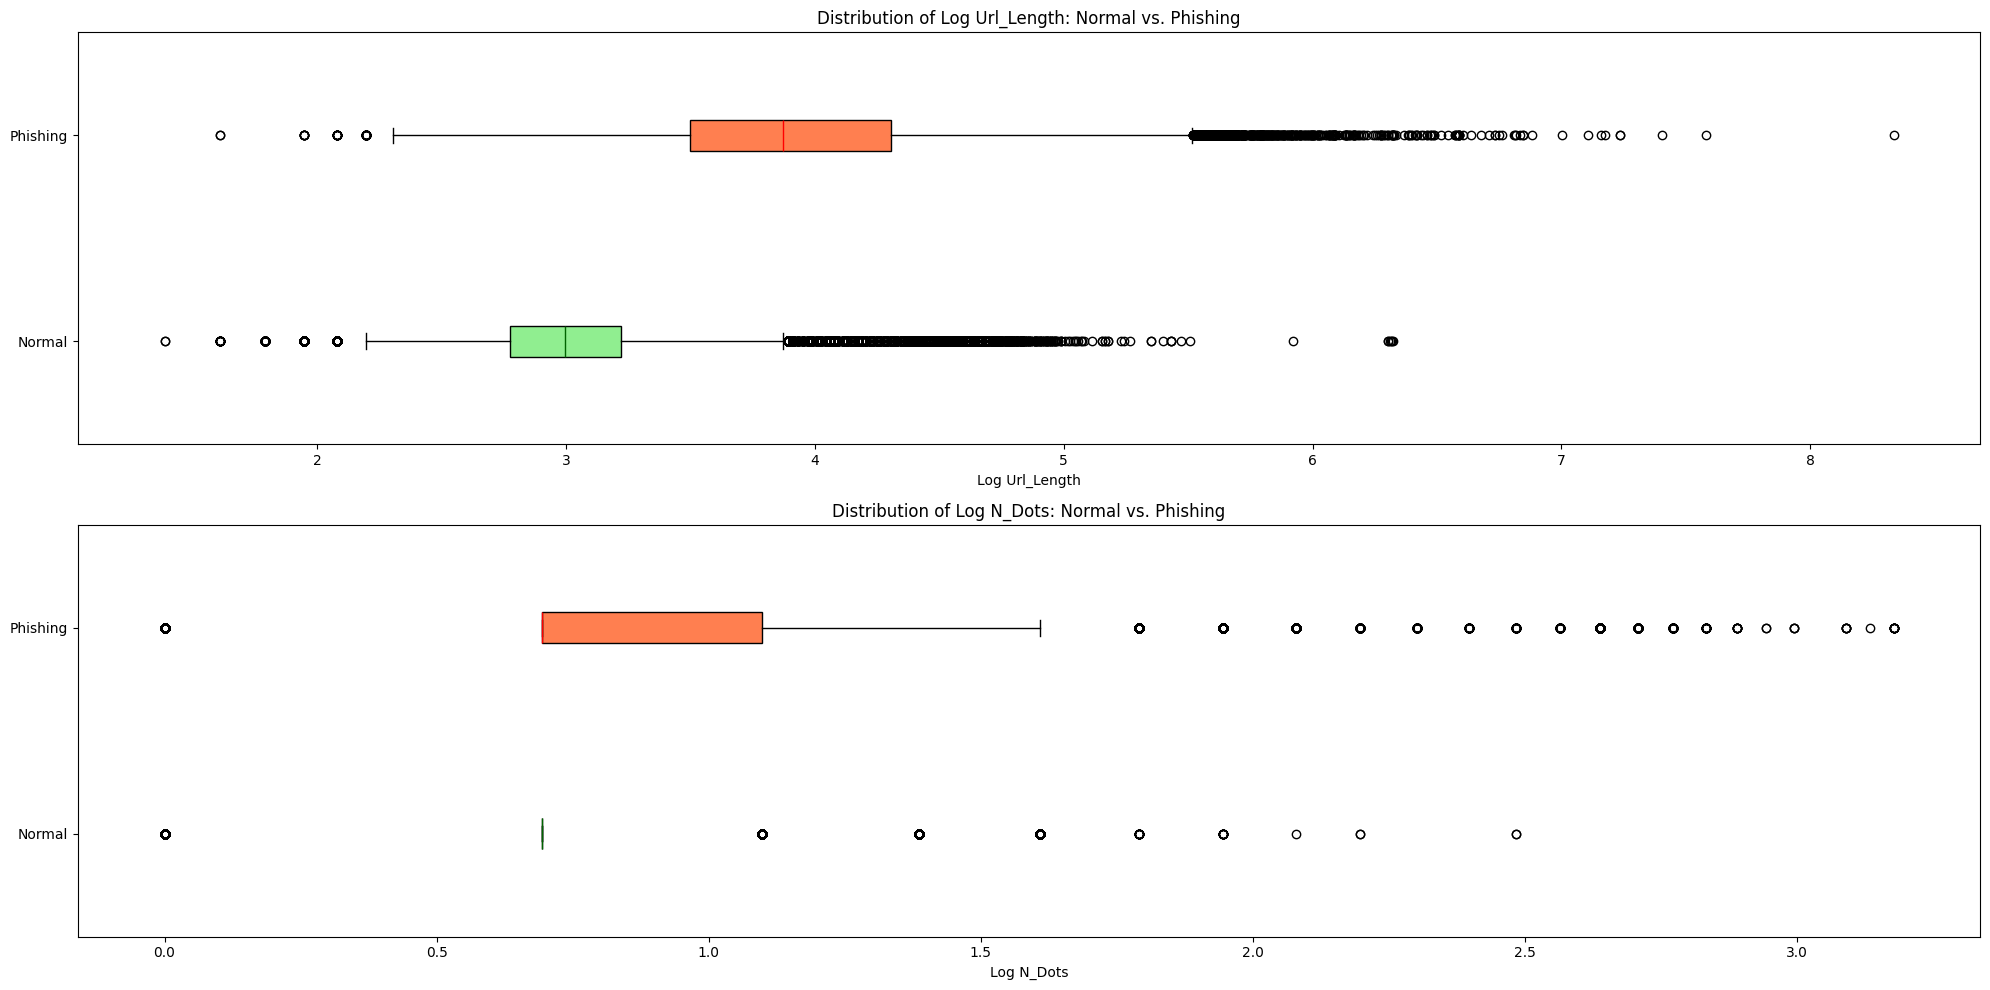

In [6]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
for i,col in enumerate(['url_length','n_dots']):
    ax[i].boxplot(np.log(df.loc[df['phishing'] == 0,col]), 
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), 
            medianprops=dict(color='darkgreen'))  
    ax[i].boxplot(np.log(df.loc[df['phishing'] == 1,col]), 
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'), 
            medianprops=dict(color='red'))  
    ax[i].set_title(f'Distribution of Log {col.title()}: Normal vs. Phishing')
    ax[i].set_xlabel(f'Log {col.title()}')
    ax[i].set_yticks([1, 2], ['Normal', 'Phishing'])
    
plt.tight_layout()
plt.show()

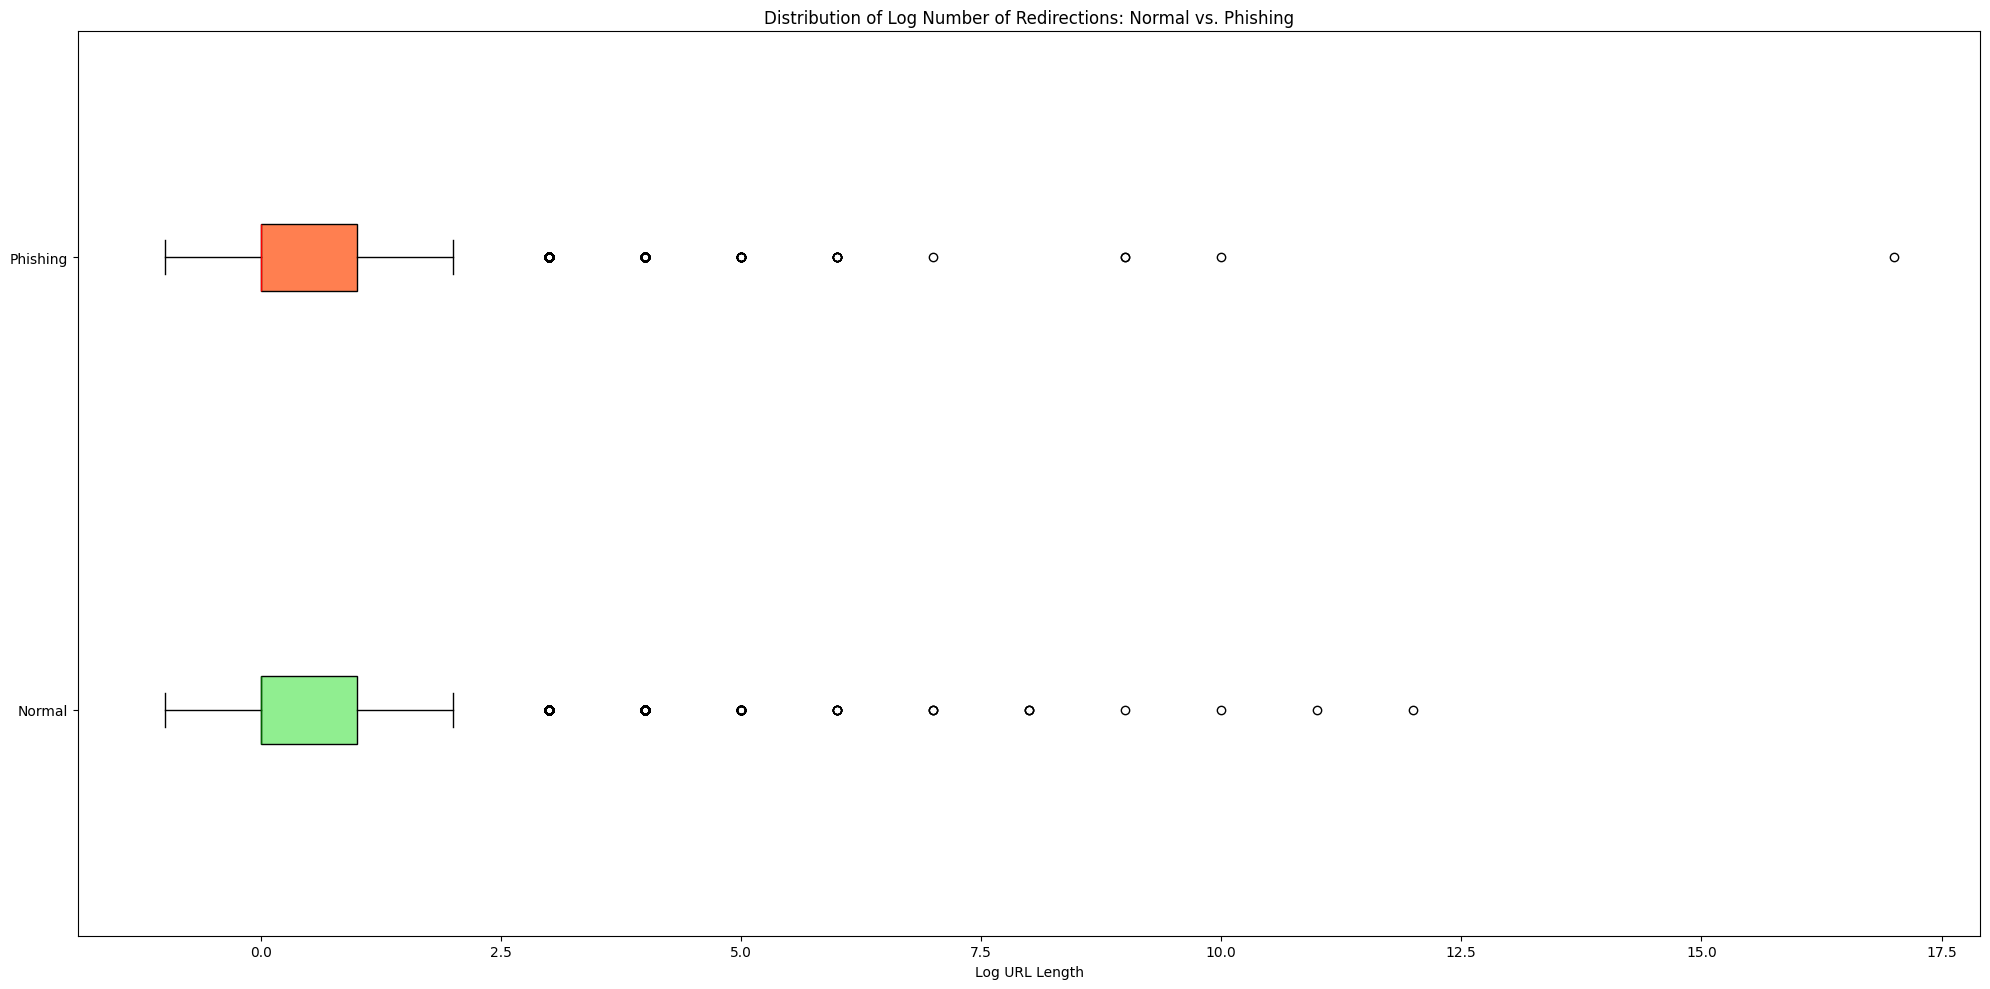

In [7]:
plt.figure(figsize=(20,10))
plt.boxplot((df.loc[df['phishing'] == 0,'n_redirection']), 
            vert=False, positions=[1], patch_artist=True,
            boxprops=dict(facecolor='lightgreen'), 
            medianprops=dict(color='darkgreen'))  
plt.boxplot((df.loc[df['phishing'] == 1,'n_redirection']), 
            vert=False, positions=[2], patch_artist=True,
            boxprops=dict(facecolor='coral'), 
            medianprops=dict(color='red'))  
plt.title('Distribution of Log Number of Redirections: Normal vs. Phishing')
plt.xlabel('Log URL Length')
plt.yticks([1, 2], ['Normal', 'Phishing'])
plt.tight_layout()
plt.show()

In [9]:
descriptive_stats = df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19]].groupby('phishing').describe()
descriptive_stats

n_hypens                                               n_underline  \
            count      mean       std  min  25%  50%  75%   max       count   
phishing                                                                      
0         63715.0  0.259123  1.132106  0.0  0.0  0.0  0.0  43.0     63715.0   
1         36362.0  0.661130  1.482982  0.0  0.0  0.0  1.0  35.0     36362.0   

                    ... n_dollar       n_percent                           \
              mean  ...      75%   max     count      mean       std  min   
phishing            ...                                                     
0         0.045672  ...      0.0   0.0   63715.0  0.075838  1.530602  0.0   
1         0.299021  ...      0.0  10.0   36362.0  0.167895  1.949346  0.0   

                                
          25%  50%  75%    max  
phishing                        
0         0.0  0.0  0.0  174.0  
1         0.0  0.0  0.0  162.0  

[2 rows x 128 columns]

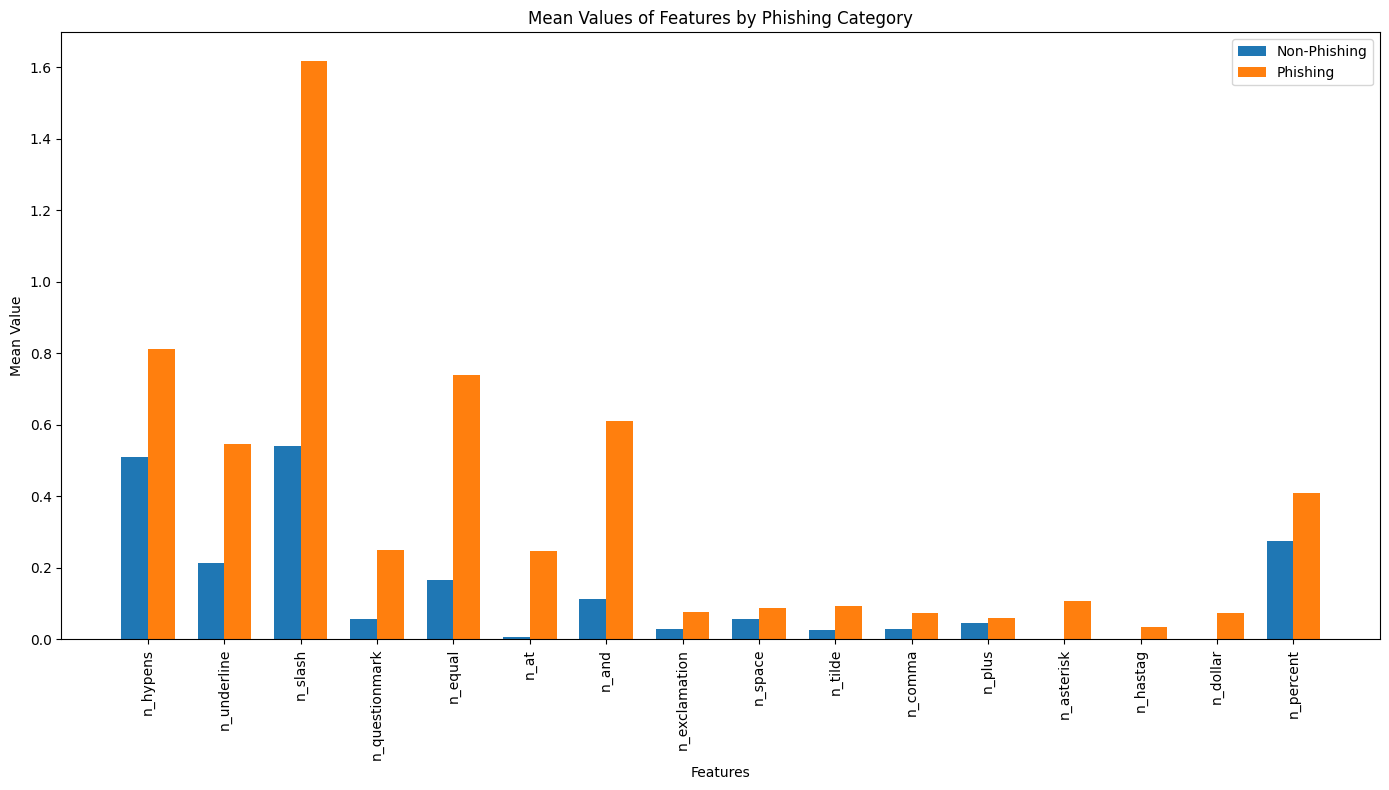

In [10]:
stat_data = descriptive_stats.xs('mean', level=1, axis=1)
stat_data = np.sqrt(stat_data)

n_features = len(stat_data.columns)
index = np.arange(n_features)
bar_width = 0.35

plt.figure(figsize=(14, 8))
plt.bar(index, stat_data.iloc[0], bar_width, label='Non-Phishing')
plt.bar(index + bar_width, stat_data.iloc[1], bar_width, label='Phishing')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features by Phishing Category')
plt.xticks(index + bar_width / 2, stat_data.columns, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

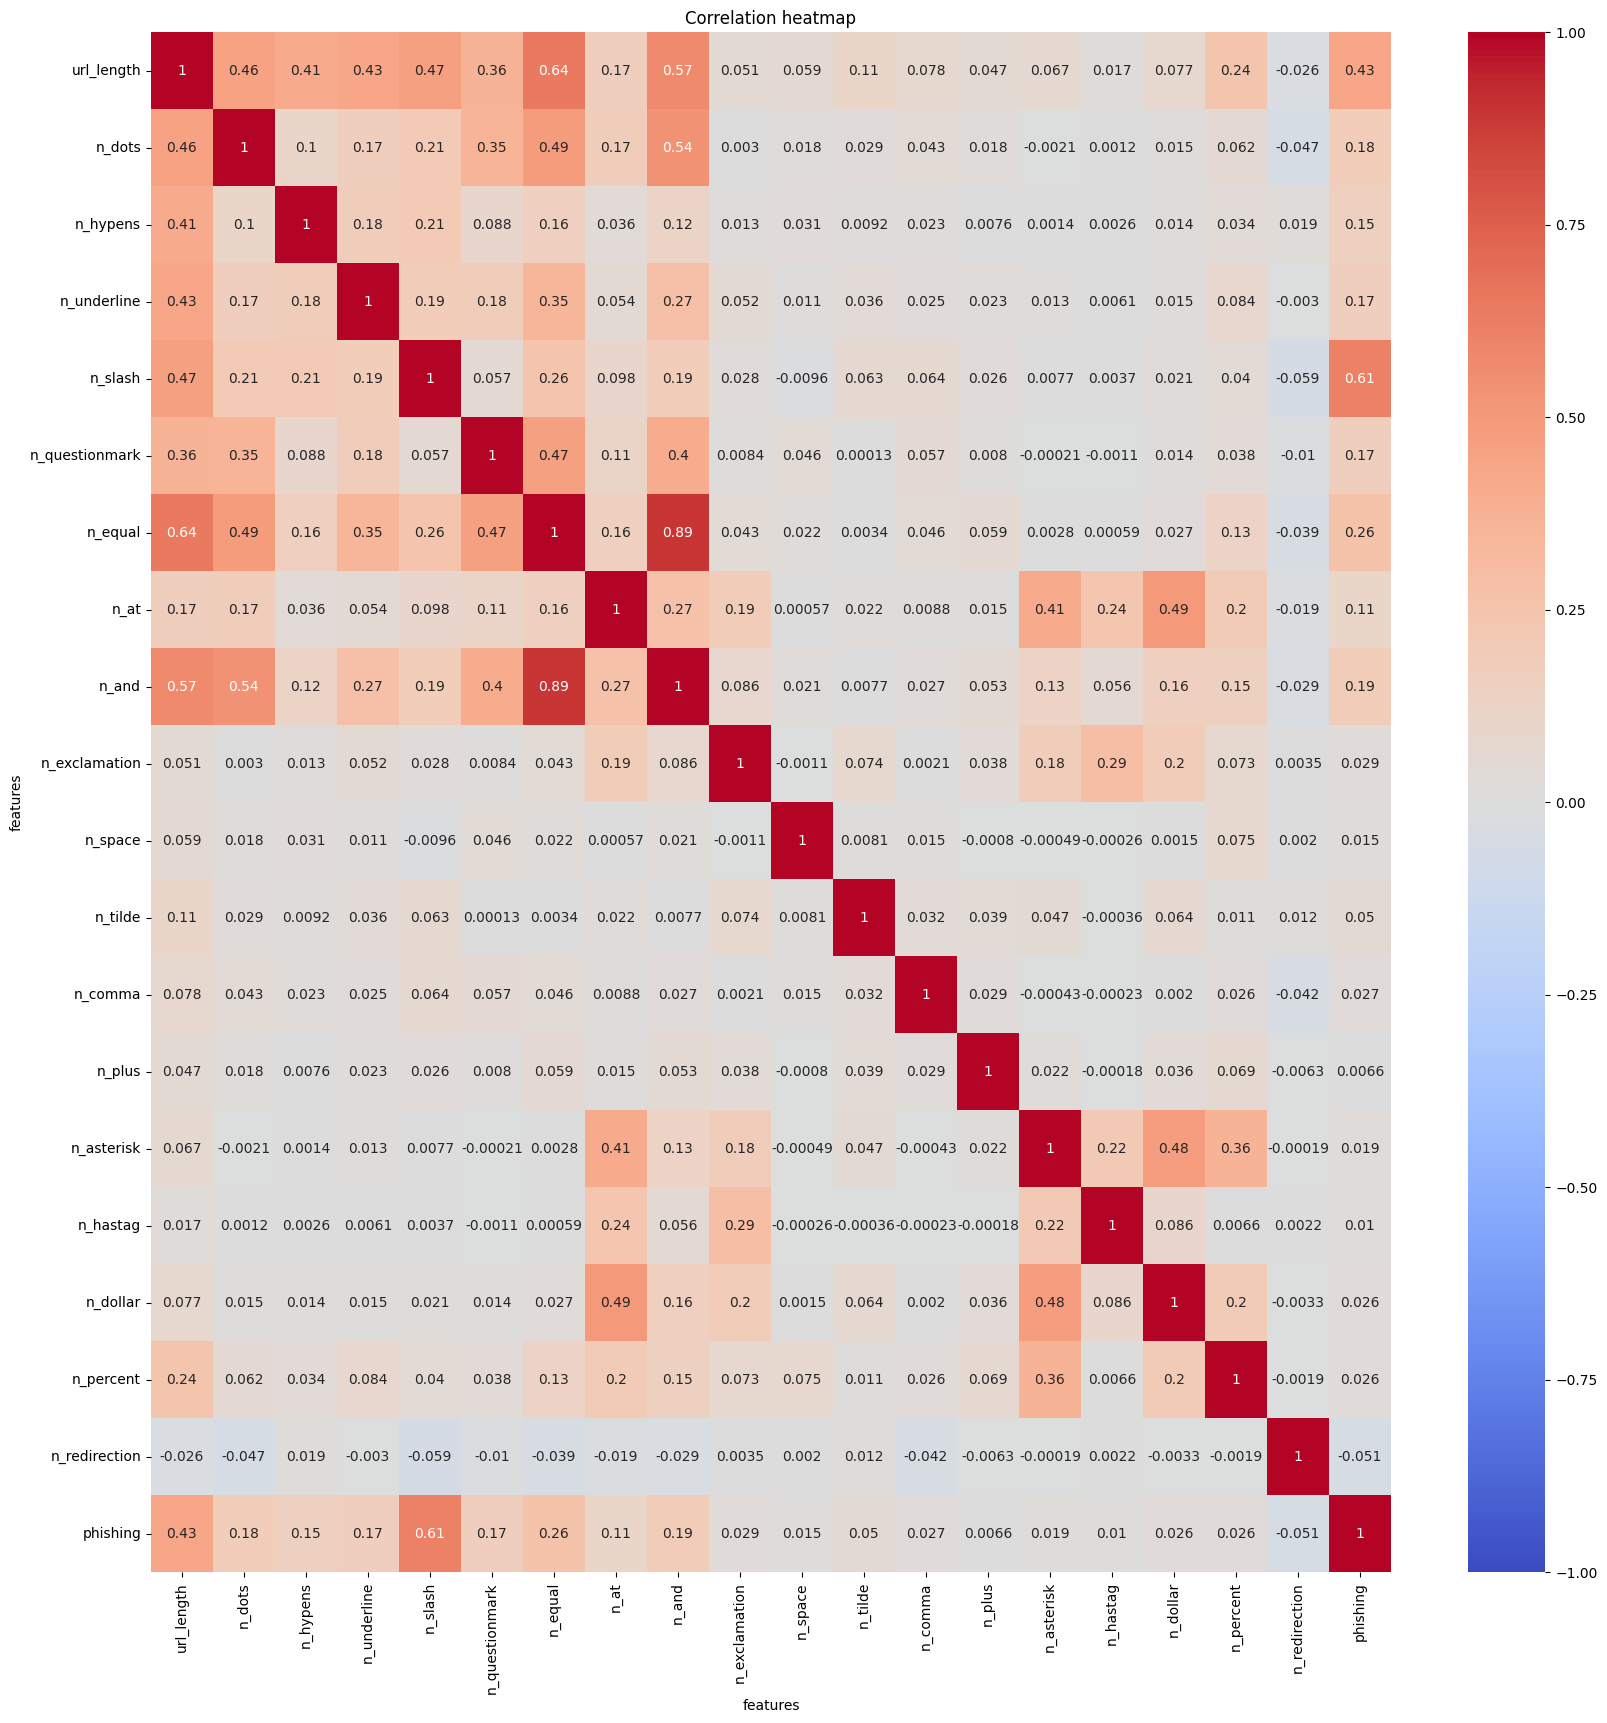

In [11]:
corr_coeff=df.corr()
plt.figure(figsize=(20,20))
heatmap=sns.heatmap(corr_coeff,vmin=-1,vmax=1,annot=True,cmap='coolwarm')
heatmap.set_xlabel('features')
heatmap.set_ylabel('features')
heatmap.set_title('Correlation heatmap')
plt.show()

In [14]:
X = df.drop(['phishing'],axis=1).values
y = df['phishing'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 2s 419us/step - accuracy: 0.8612 - loss: 0.3238 - val_accuracy: 0.8815 - val_loss: 0.2690
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 347us/step - accuracy: 0.8813 - loss: 0.2657 - val_accuracy: 0.8830 - val_loss: 0.2711
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 349us/step - accuracy: 0.8823 - loss: 0.2619 - val_accuracy: 0.8839 - val_loss: 0.2648
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 347us/step - accuracy: 0.8862 - loss: 0.2549 - val_accuracy: 0.8867 - val_loss: 0.2597
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.8858 - loss: 0.2572 - val_accuracy: 0.8864 - val_loss: 0.2586
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.8864 - loss: 0.2552 - val_accuracy: 0.8896 - val_loss: 0.2560
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.8873 - loss: 0.2496 - val_accuracy: 0.8882 - val_loss: 0.2599
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - accuracy: 0.8876 -

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8914 - loss: 0.2533
Test Accuracy: 0.8935185074806213


In [21]:
def confusion_matrix_plot(y_test,predictions):
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", 
                cmap="Blues",
                square=True,
                cbar=False,
                xticklabels=['False', 'True'],
                yticklabels=['False', 'True'])
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(2) + 0.5
    plt.xticks(tick_marks, ['Non-phishing', 'Phishing'], rotation=0)
    plt.yticks(tick_marks, ['Non-phishing', 'Phishing'], rotation=0)
    plt.tight_layout()
    plt.show()

def area_under_curve(model,X_test,y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.show()




def calculate_metrics(model,X_test,y_test):
    predictions = model.predict(X_test)
    print(f"Accuracy Score: {accuracy_score(y_test,predictions)}")
    confusion_matrix_plot(y_test,predictions)
    area_under_curve(model,X_test,y_test)
    
#calculate_metrics(model,X_test,y_test)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step


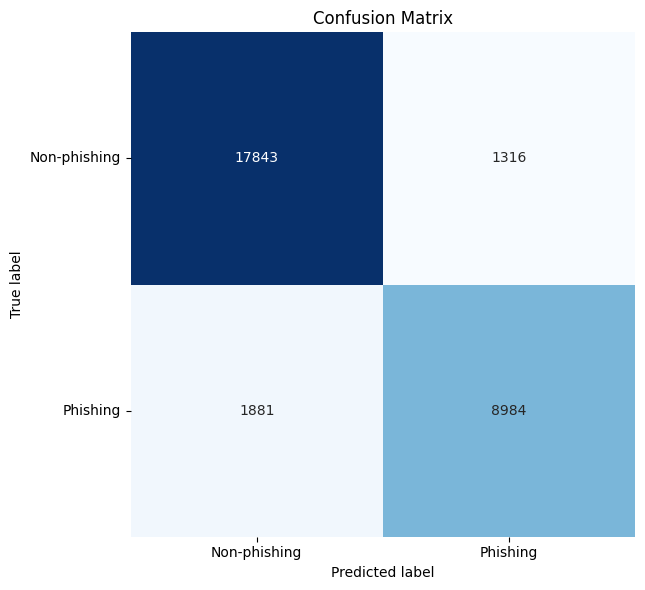

In [22]:
predictions = (model.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


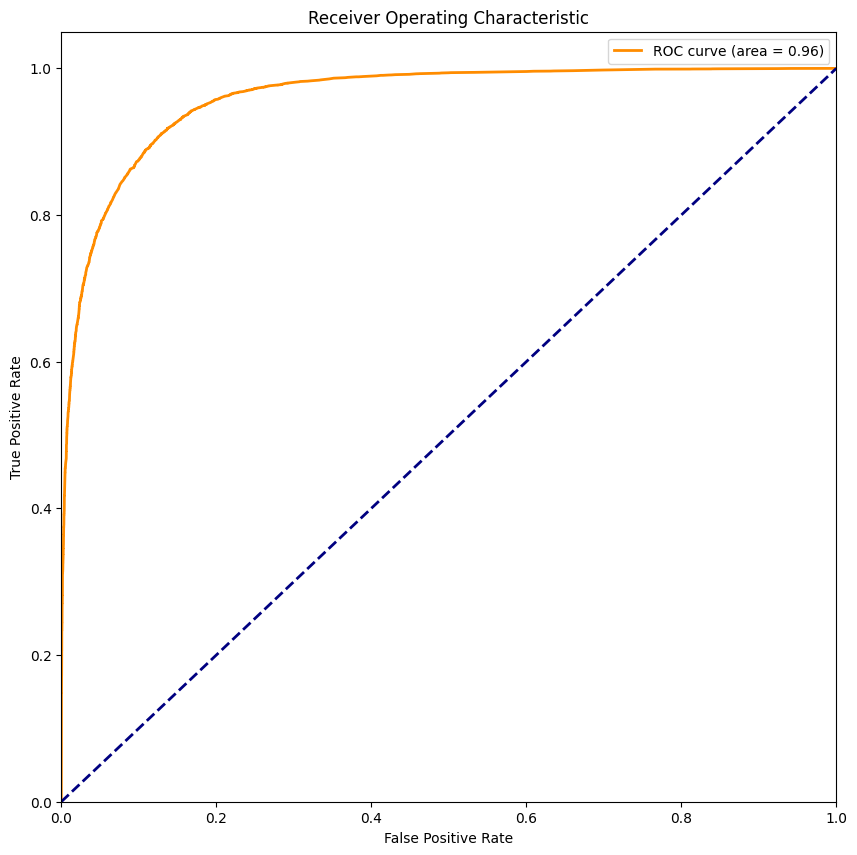

In [23]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [27]:
model1 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.8532 - loss: 0.3346 - val_accuracy: 0.8770 - val_loss: 0.2776
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - accuracy: 0.8765 - loss: 0.2744 - val_accuracy: 0.8792 - val_loss: 0.2699
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 310us/step - accuracy: 0.8814 - loss: 0.2643 - val_accuracy: 0.8819 - val_loss: 0.2686
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 325us/step - accuracy: 0.8796 - loss: 0.2644 - val_accuracy: 0.8800 - val_loss: 0.2632
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step - accuracy: 0.8817 - loss: 0.2638 - val_accuracy: 0.8828 - val_loss: 0.2613
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.8833 - loss: 0.2593 - val_accuracy: 0.8832 - val_loss: 0.2625
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 0.8863 - loss: 0.2559 - val_accuracy: 0.8848 - val_loss: 0.2582
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.8853 -

In [28]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.8874 - loss: 0.2532
Test Accuracy: 0.8895883560180664


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step


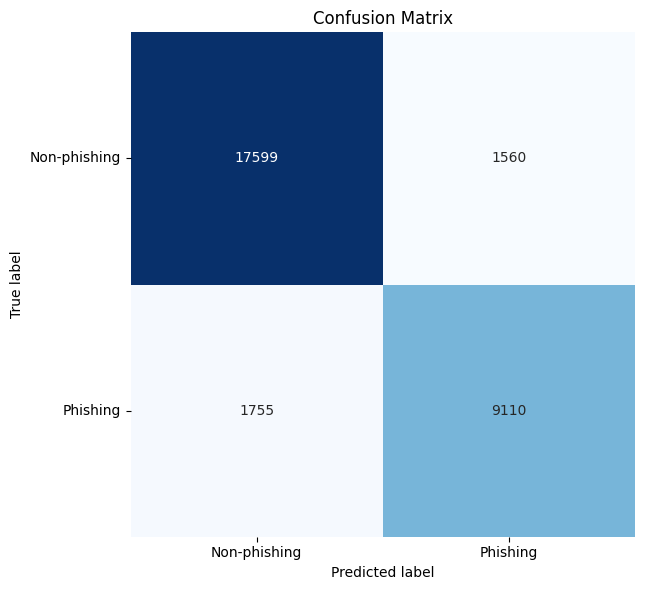

In [29]:
predictions = (model1.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step


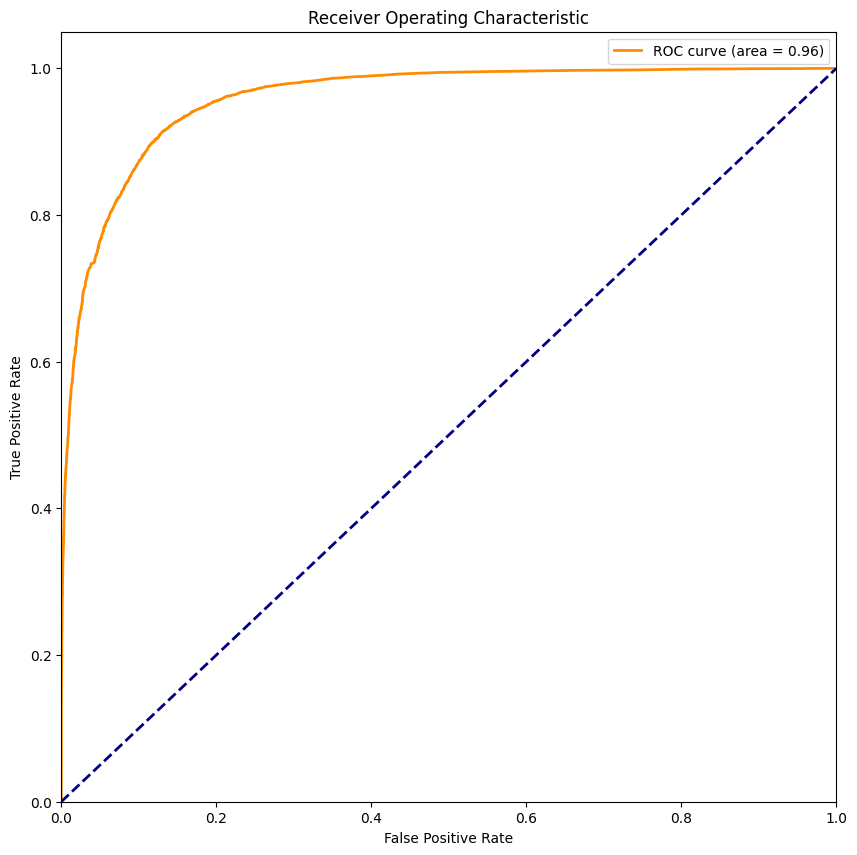

In [33]:
y_pred_proba = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [30]:
model2 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.8592 - loss: 0.3258 - val_accuracy: 0.8762 - val_loss: 0.2718
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.8787 - loss: 0.2697 - val_accuracy: 0.8787 - val_loss: 0.2683
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.8776 - loss: 0.2679 - val_accuracy: 0.8813 - val_loss: 0.2650
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.8810 - loss: 0.2655 - val_accuracy: 0.8837 - val_loss: 0.2619
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.8861 - loss: 0.2572 - val_accuracy: 0.8842 - val_loss: 0.2603
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.8843 - loss: 0.2581 - val_accuracy: 0.8859 - val_loss: 0.2567
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 349us/step - accuracy: 0.8871 - loss: 0.2573 - val_accuracy: 0.8844 - val_loss: 0.2658
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.8870 -

In [31]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.8886 - loss: 0.2516
Test Accuracy: 0.8908872604370117


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


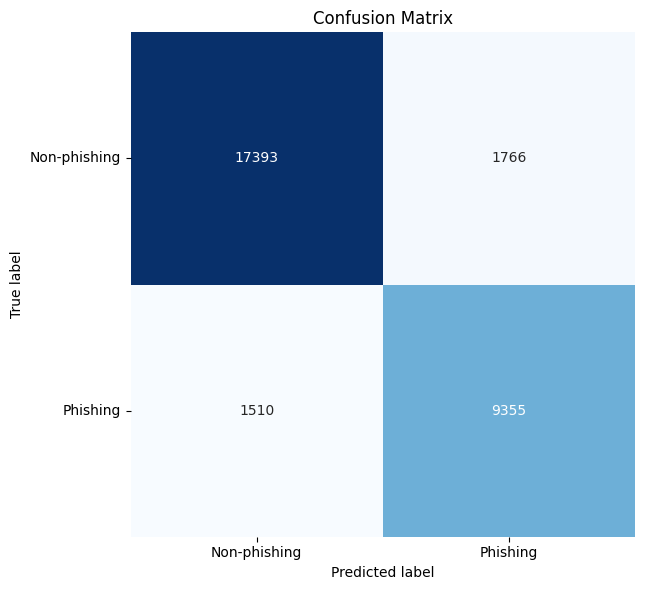

In [32]:
predictions = (model2.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step


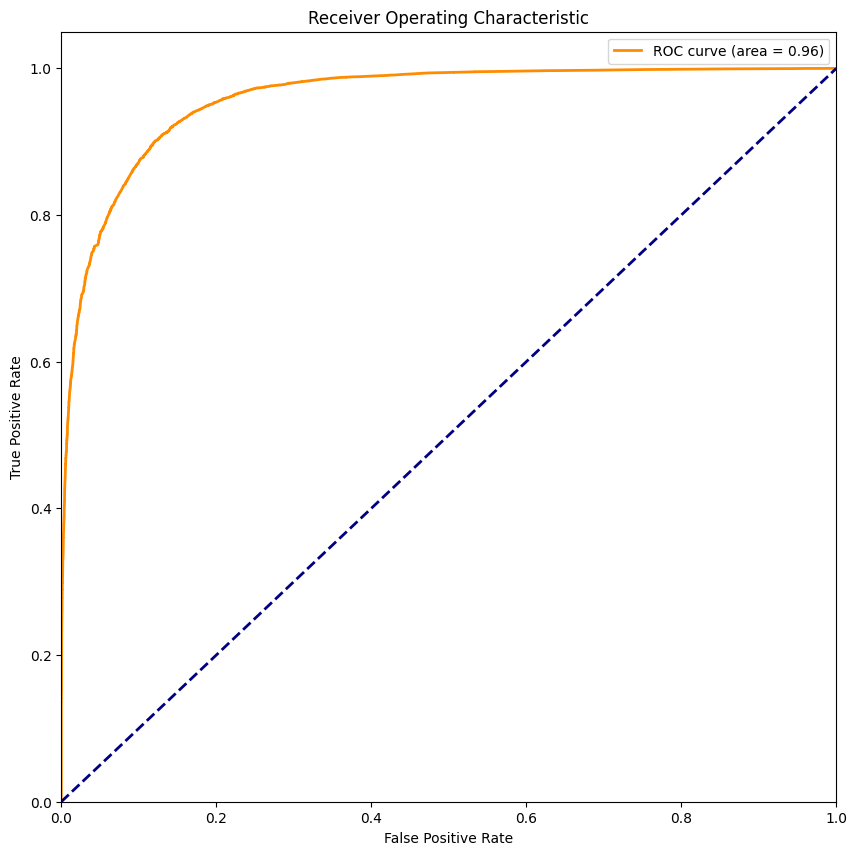

In [34]:
y_pred_proba = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [35]:
model3 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.8623 - loss: 0.3128 - val_accuracy: 0.8800 - val_loss: 0.2709
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8787 - loss: 0.2712 - val_accuracy: 0.8831 - val_loss: 0.2699
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8831 - loss: 0.2646 - val_accuracy: 0.8826 - val_loss: 0.2610
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.8824 - loss: 0.2592 - val_accuracy: 0.8897 - val_loss: 0.2564
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.8874 - loss: 0.2547 - val_accuracy: 0.8855 - val_loss: 0.2572
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.8862 - loss: 0.2519 - val_accuracy: 0.8870 - val_loss: 0.2568
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.8884 - loss: 0.2475 - val_accuracy: 0.8892 - val_loss: 0.2519
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8876 -

In [36]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.8913 - loss: 0.2480
Test Accuracy: 0.8934851884841919


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


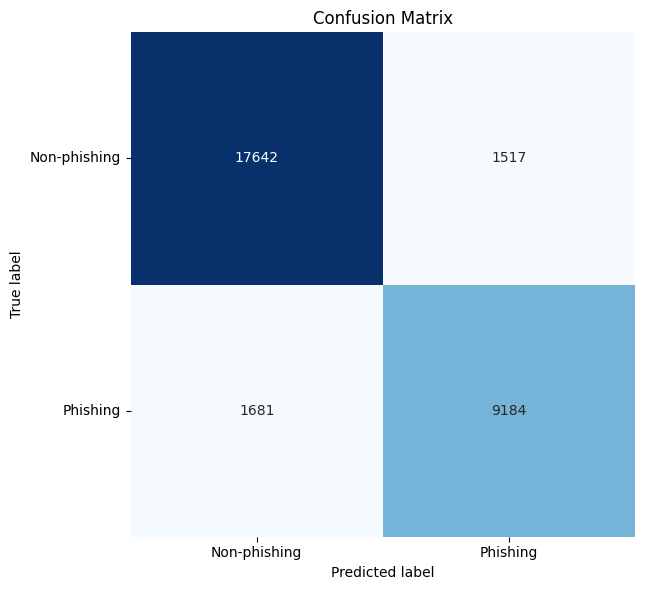

In [37]:
predictions = (model3.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


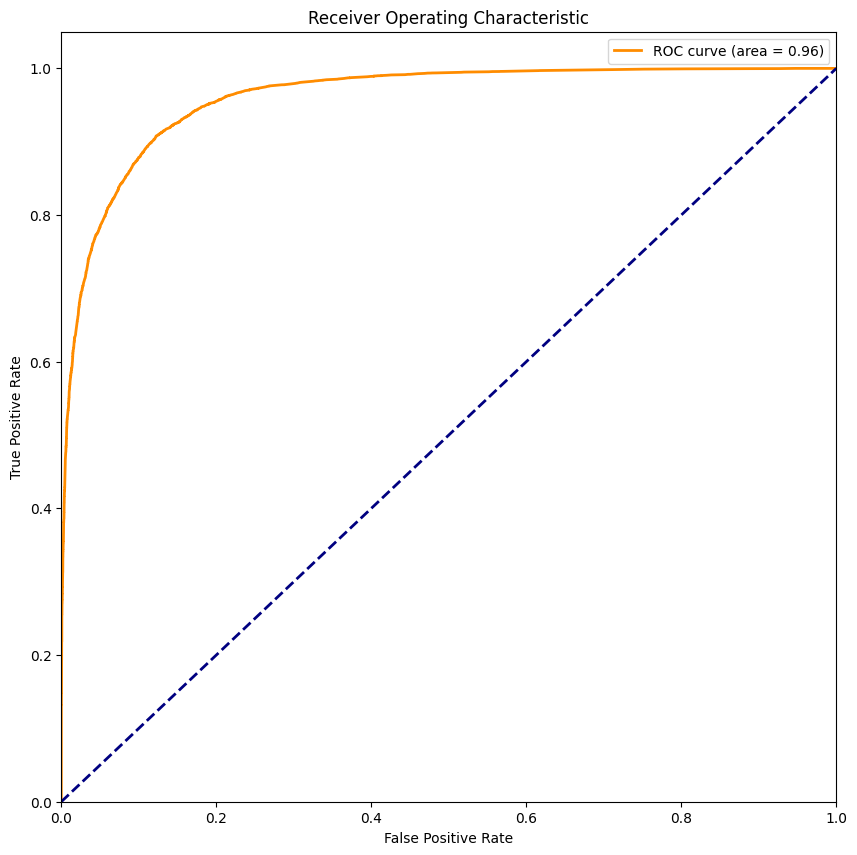

In [38]:
y_pred_proba = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [39]:
model4 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model4.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model4.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8592 - loss: 0.3198 - val_accuracy: 0.8802 - val_loss: 0.2716
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.8817 - loss: 0.2651 - val_accuracy: 0.8802 - val_loss: 0.2689
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.8811 - loss: 0.2611 - val_accuracy: 0.8872 - val_loss: 0.2649
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.8849 - loss: 0.2562 - val_accuracy: 0.8874 - val_loss: 0.2612
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8863 - loss: 0.2566 - val_accuracy: 0.8882 - val_loss: 0.2560
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.8852 - loss: 0.2523 - val_accuracy: 0.8901 - val_loss: 0.2545
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.8876 - loss: 0.2503 - val_accuracy: 0.8892 - val_loss: 0.2549
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.8910 -

In [40]:
test_loss, test_acc = model4.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.8901 - loss: 0.2521
Test Accuracy: 0.8930855393409729


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


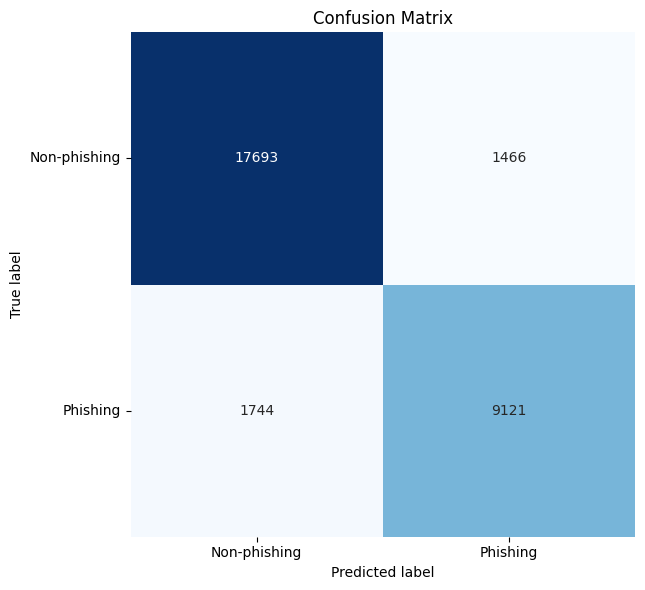

In [41]:
predictions = (model4.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


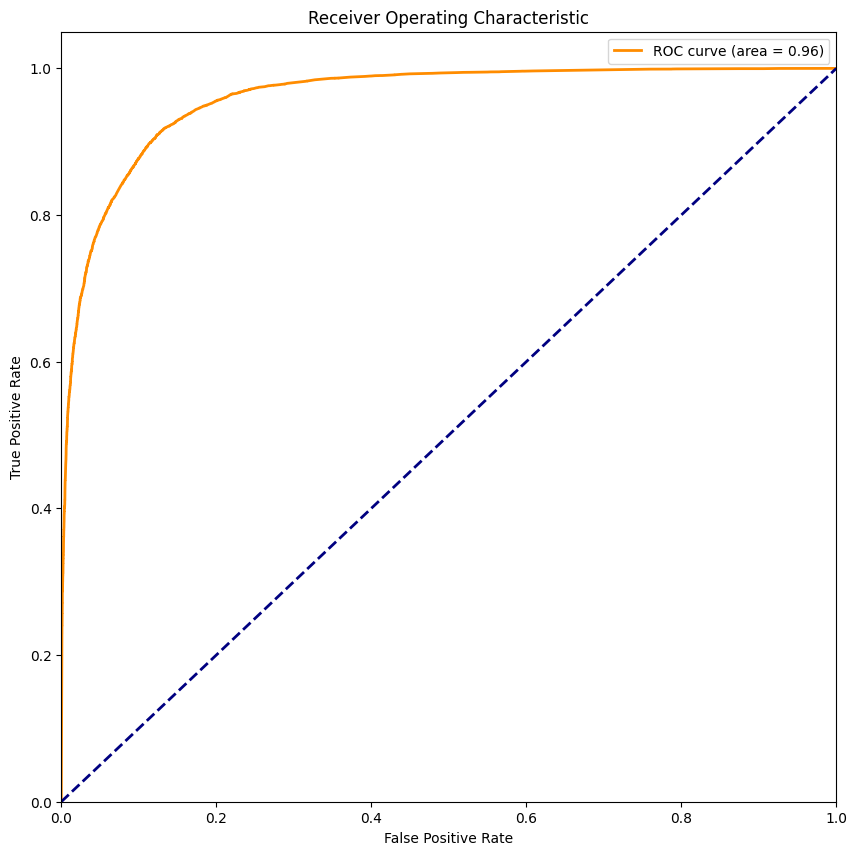

In [42]:
y_pred_proba = model4.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [43]:
from tensorflow.keras.layers import LeakyReLU
model5 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation=LeakyReLU(alpha=0.1)),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(32, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid') 
])

model5.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model5.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25


/Users/rosireddyvangala/Documents/Webpage_phishing/webphish/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 3s 447us/step - accuracy: 0.8624 - loss: 0.3175 - val_accuracy: 0.8814 - val_loss: 0.2718
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8765 - loss: 0.2707 - val_accuracy: 0.8855 - val_loss: 0.2640
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8800 - loss: 0.2641 - val_accuracy: 0.8854 - val_loss: 0.2620
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.8834 - loss: 0.2588 - val_accuracy: 0.8854 - val_loss: 0.2634
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.8847 - loss: 0.2545 - val_accuracy: 0.8864 - val_loss: 0.2631
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8866 - loss: 0.2542 - val_accuracy: 0.8895 - val_loss: 0.2588
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.8870 - loss: 0.2515 - val_accuracy: 0.8895 - val_loss: 0.2558
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8888 - loss: 0.24

In [44]:
test_loss, test_acc = model5.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.8897 - loss: 0.2558
Test Accuracy: 0.8925859332084656


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


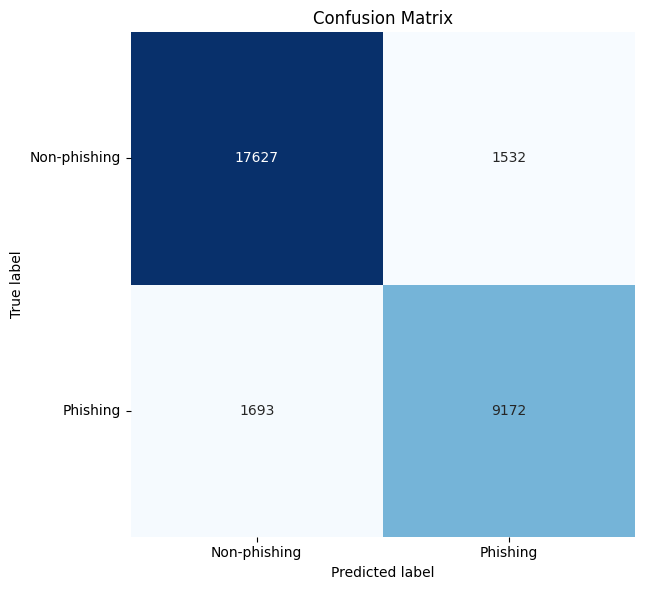

In [45]:
predictions = (model5.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step


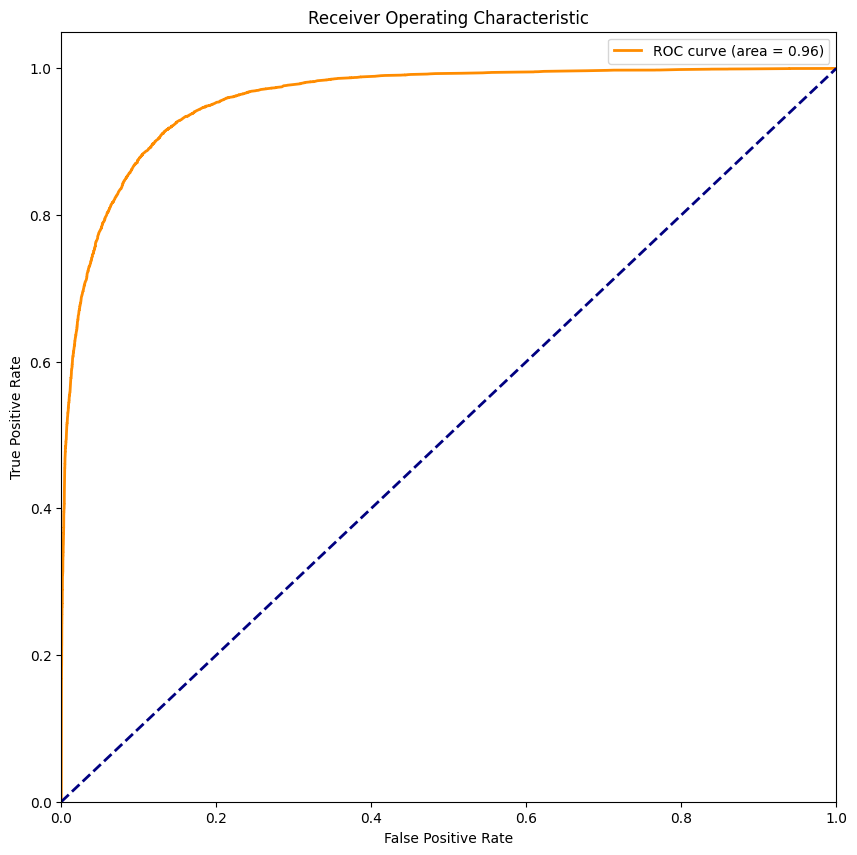

In [46]:
y_pred_proba = model5.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [47]:
from tensorflow.keras.layers import LeakyReLU
model6 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='tanh'),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(32, activation=LeakyReLU(alpha=0.1)),
    Dense(1, activation='sigmoid') 
])

model6.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model6.fit(X_train, y_train, epochs=25,validation_split=0.2,)

Epoch 1/25


/Users/rosireddyvangala/Documents/Webpage_phishing/webphish/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.8647 - loss: 0.3114 - val_accuracy: 0.8794 - val_loss: 0.2710
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step - accuracy: 0.8794 - loss: 0.2696 - val_accuracy: 0.8839 - val_loss: 0.2661
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.8868 - loss: 0.2574 - val_accuracy: 0.8840 - val_loss: 0.2633
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.8863 - loss: 0.2527 - val_accuracy: 0.8861 - val_loss: 0.2579
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.8858 - loss: 0.2567 - val_accuracy: 0.8839 - val_loss: 0.2575
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.8882 - loss: 0.2481 - val_accuracy: 0.8858 - val_loss: 0.2580
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.8872 - loss: 0.2515 - val_accuracy: 0.8869 - val_loss: 0.2565
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.8850 - loss: 0.25

In [48]:
test_loss, test_acc = model6.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8877 - loss: 0.2498
Test Accuracy: 0.8901545405387878


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


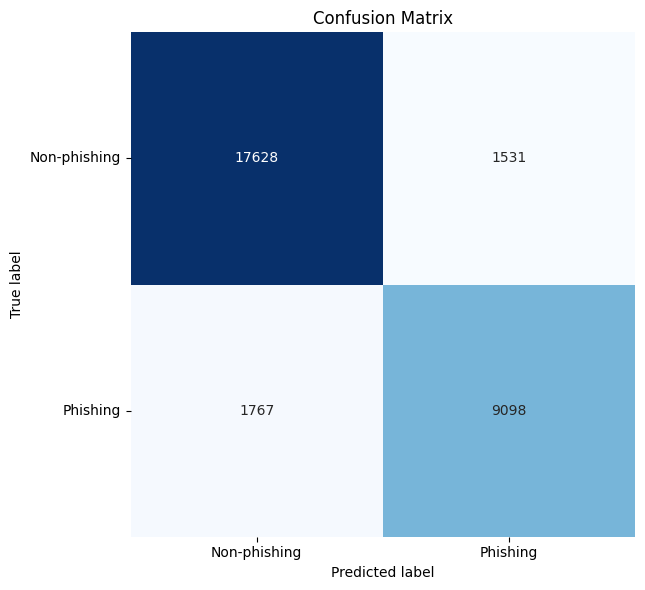

In [49]:
predictions = (model6.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [50]:
from tensorflow.keras.layers import LeakyReLU
model7 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='tanh'),
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model7.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model7.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25


/Users/rosireddyvangala/Documents/Webpage_phishing/webphish/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.8668 - loss: 0.3029 - val_accuracy: 0.8801 - val_loss: 0.2686
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8807 - loss: 0.2656 - val_accuracy: 0.8825 - val_loss: 0.2662
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.8856 - loss: 0.2581 - val_accuracy: 0.8849 - val_loss: 0.2595
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.8859 - loss: 0.2582 - val_accuracy: 0.8862 - val_loss: 0.2578
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - accuracy: 0.8852 - loss: 0.2557 - val_accuracy: 0.8873 - val_loss: 0.2586
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - accuracy: 0.8853 - loss: 0.2556 - val_accuracy: 0.8879 - val_loss: 0.2559
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.8899 - loss: 0.2491 - val_accuracy: 0.8868 - val_loss: 0.2539
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.8847 - loss: 0.25

In [51]:
test_loss, test_acc = model7.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.8911 - loss: 0.2475
Test Accuracy: 0.8941180109977722


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step


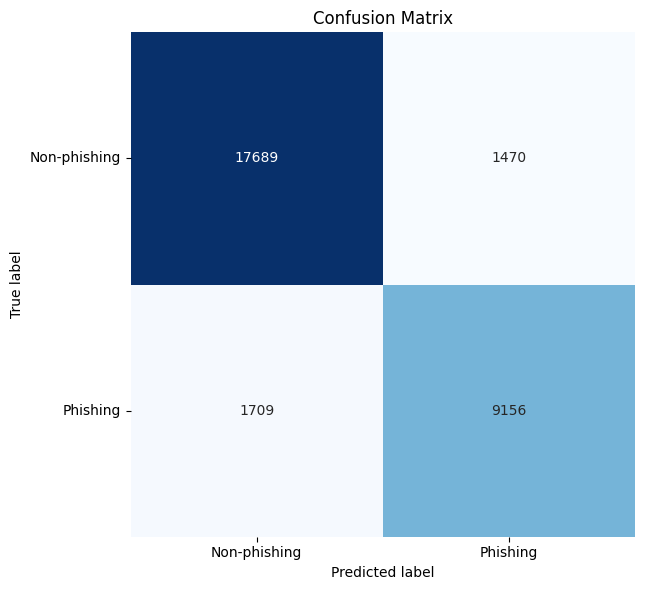

In [52]:
predictions = (model7.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [53]:
#from tensorflow.keras.layers import LeakyReLU
model8 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='tanh'),
    Dense(64, activation='relu'),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model8.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model8.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.8653 - loss: 0.3033 - val_accuracy: 0.8822 - val_loss: 0.2698
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.8826 - loss: 0.2658 - val_accuracy: 0.8847 - val_loss: 0.2622
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.8838 - loss: 0.2589 - val_accuracy: 0.8850 - val_loss: 0.2587
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.8834 - loss: 0.2617 - val_accuracy: 0.8885 - val_loss: 0.2552
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.8873 - loss: 0.2539 - val_accuracy: 0.8854 - val_loss: 0.2568
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.8859 - loss: 0.2513 - val_accuracy: 0.8880 - val_loss: 0.2513
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8870 - loss: 0.2522 - val_accuracy: 0.8855 - val_loss: 0.2535
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8861 -

In [54]:
test_loss, test_acc = model8.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.8889 - loss: 0.2509
Test Accuracy: 0.892752468585968


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step


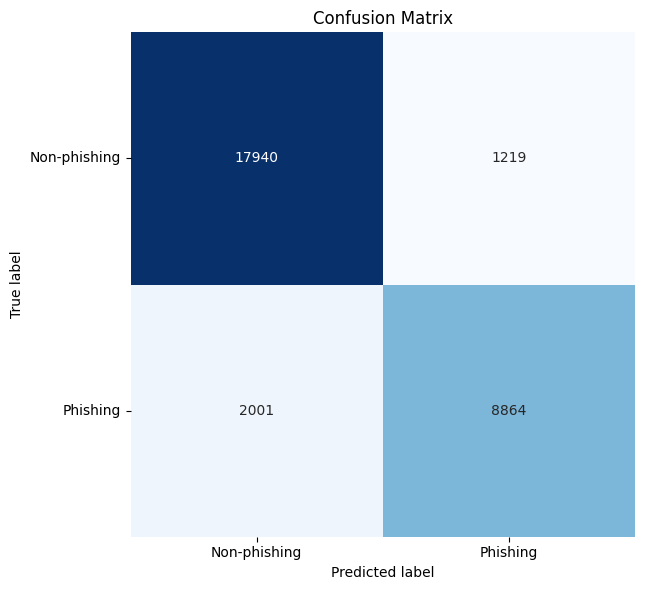

In [55]:
predictions = (model8.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [59]:
#from tensorflow.keras.layers import LeakyReLU
model9 = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(126, activation='tanh'),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(1, activation='sigmoid') 
])

model9.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history = model9.fit(X_train, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.8648 - loss: 0.3081 - val_accuracy: 0.8792 - val_loss: 0.2733
Epoch 2/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.8792 - loss: 0.2700 - val_accuracy: 0.8790 - val_loss: 0.2720
Epoch 3/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.8853 - loss: 0.2607 - val_accuracy: 0.8875 - val_loss: 0.2558
Epoch 4/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.8866 - loss: 0.2554 - val_accuracy: 0.8852 - val_loss: 0.2538
Epoch 5/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.8888 - loss: 0.2466 - val_accuracy: 0.8862 - val_loss: 0.2541
Epoch 6/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8850 - loss: 0.2503 - val_accuracy: 0.8864 - val_loss: 0.2523
Epoch 7/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - accuracy: 0.8886 - loss: 0.2454 - val_accuracy: 0.8883 - val_loss: 0.2508
Epoch 8/25
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.8906 -

In [60]:
test_loss, test_acc = model9.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8907 - loss: 0.2501
Test Accuracy: 0.8935185074806213


939/939 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step


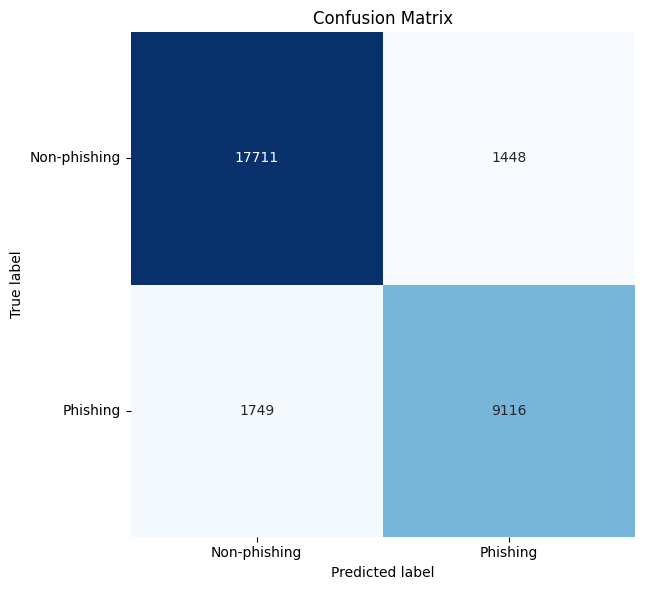

In [61]:
predictions = (model9.predict(X_test) > 0.5).astype(int)
confusion_matrix_plot(y_test,predictions)

In [63]:
df.columns

Index(['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash',
       'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation',
       'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag',
       'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
      dtype='object')

In [64]:
df['dots_share'] = round(df['n_dots']/df['url_length'],2)
df['hypens_share'] = round(df['n_hypens']/df['url_length'],2)
df['underline_share'] = round(df['n_underline']/df['url_length'],2)
df['slash_share'] = round(df['n_slash']/df['url_length'],2)
df['questionmark_share'] = round(df['n_questionmark']/df['url_length'],2)
df['equal_share'] = round(df['n_equal']/df['url_length'],2)
df['at_share'] = round(df['n_at']/df['url_length'],2)
df['and_share'] = round(df['n_and']/df['url_length'],2)
df['exclamation_share'] = round(df['n_exclamation']/df['url_length'],2)
df['space_share'] = round(df['n_space']/df['url_length'],2)
df['tilde_share'] = round(df['n_tilde']/df['url_length'],2)
df['comma_share'] = round(df['n_comma']/df['url_length'],2)
df['plus_share'] = round(df['n_plus']/df['url_length'],2)
df['percent_share'] = round(df['n_percent']/df['url_length'],2)
df.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,...,questionmark_share,equal_share,at_share,and_share,exclamation_share,space_share,tilde_share,comma_share,plus_share,percent_share
0,37,3,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,77,1,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4,1,2,0,1,3,0,2,0,...,0.01,0.02,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0
3,18,2,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,55,2,2,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X = df.drop(['phishing'],axis=1).values
y = df['phishing'].values